In [17]:
import pandas as pd

# Load data
tbl_catering = pd.read_csv('tbl_catering.csv')
tbl_catering_details = pd.read_csv('tbl_catering_details.csv')
tbl_catering_products = pd.read_csv('tbl_catering_products.csv')

# Merge tbl_catering and tbl_catering_details
data = pd.merge(tbl_catering, tbl_catering_details, left_on='ID', right_on='CATERING_ID')

# Merge with tbl_catering_products
data = pd.merge(data, tbl_catering_products, left_on='ITEM_DESC', right_on='PRODUCT_NAME')

# Display the merged data
print(data.head())


   ID_x DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0   351     4/24/2021      18:30:00             30              \N   
1   351     4/24/2021      18:30:00             30              \N   
2   351     4/24/2021      18:30:00             30              \N   
3   351     4/24/2021      18:30:00             30              \N   
4   351     4/24/2021      18:30:00             30              \N   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  ...  \
0          1525.0    0.0         1525.0           9       0.0  ...   
1          1525.0    0.0         1525.0           9       0.0  ...   
2          1525.0    0.0         1525.0           9       0.0  ...   
3          1525.0    0.0         1525.0           9       0.0  ...   
4          1525.0    0.0         1525.0           9       0.0  ...   

     CATEGORY_NAME  CATEGORY_ID       PRODUCT_NAME  UNIT PRICE_y  \
0     ENTREE - VEG            1          Dal Tadka    18   130.0   
1  APPETIZER - VEG    

In [18]:
import re

def convert_quantity(qty_str):
    if pd.isna(qty_str):
        return 0
    
    # Remove any non-numeric characters and normalize the format
    qty_str = qty_str.replace('tr', '').replace('cups', '').replace(' ', '').replace(',', '.').strip()
    
    # Regular expression to match fractions and numbers
    fraction_pattern = re.compile(r'(\d+)(?:\s*(?:\+|/)\s*(\d+))?')
    
    # Try to match the pattern
    match = fraction_pattern.match(qty_str)
    if match:
        whole_number = float(match.group(1))
        fraction = float(match.group(2) or 0)
        return whole_number + fraction
    else:
        try:
            return float(qty_str)
        except ValueError:
            return 0

# Apply conversion function to QUANTITY column
data['QUANTITY'] = data['QUANTITY'].apply(convert_quantity)

data


,ID_x,DELIVERY_DATE,DELIVERY_TIME,DELIVERY_MODE,DELIVERY_STATUS,INVOICE_AMOUNT,TAXES,CATERING_COST,SHOW_PRICE,DISCOUNT,...,CATEGORY_NAME,CATEGORY_ID,PRODUCT_NAME,UNIT,PRICE_y,IS_DAIRY_FREE,IS_GLUTEN_FREE,IS_NUT_FREE,IS_VEGAN,EXCLUDE_ITEM
0,351,4/24/2021,18:30:00,30,\N,1525.00,0.00,1525.00,9,0.0,...,ENTREE - VEG,1,Dal Tadka,18,130.00,0,1,1,0,0
1,351,4/24/2021,18:30:00,30,\N,1525.00,0.00,1525.00,9,0.0,...,APPETIZER - VEG,1,Gobi Pepper Fry,18,140.00,0,0,1,0,-1
2,351,4/24/2021,18:30:00,30,\N,1525.00,0.00,1525.00,9,0.0,...,ENTREE - VEG,1,Kadai Paneer,18,140.00,0,1,1,0,0
3,351,4/24/2021,18:30:00,30,\N,1525.00,0.00,1525.00,9,0.0,...,SIDES,1,Raitha,18,40.00,0,1,1,0,0
4,351,4/24/2021,18:30:00,30,\N,1525.00,0.00,1525.00,9,0.0,...,NOODLES,1,Veg Hakka Noodles,18,120.00,0,0,1,0,0
5,796,5/1/2022,17:00:00,32,\N,1630.00,0.00,1350.00,9,280.0,...,ENTREE - CHICKEN,1,Village Chicken Curry,18,150.00,0,1,1,0,0
6,838,5/25/2022,18:00:00,31,\N,1007.50,0.00,902.50,9,105.0,...,ENTREE - CHICKEN,1,Village Chicken Curry,18,150.00,0,1,1,0,0
7,848,7/9/2022,17:00:00,32,\N,1880.00,0.00,2180.00,9,0.0,...,CUSTOM DESSERTS,1,Kulfi - Malai,20,3.00,0,0,0,0,1
8,1294,1/14/2023,13:00:00,32,\N,29750.00,0.00,30000.00,9,0.0,...,CUSTOM DESSERTS,1,Kulfi - Malai,20,3.00,0,0,0,0,1
9,1883,6/2/2023,18:30:00,32,\N,404.50,30.34,534.84,9,0.0,...,CUSTOM DESSERTS,1,Kulfi - Malai,20,3.00,0,0,0,0,1


In [19]:

# Aggregate quantities per dish
dish_quantities = data.groupby(['ID_x', 'PRODUCT_NAME'])['QUANTITY'].sum().unstack().fillna(0)
dish_quantities.reset_index(inplace=True)



In [31]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Convert quantities if not already done
def convert_quantity(qty):
    if isinstance(qty, float):
        return qty
    if isinstance(qty, str):
        try:
            if 'tr' in qty:
                return float(qty.split()[0].replace(',', ''))
            elif 'cups' in qty:
                return float(qty.split()[0].replace(',', ''))
            else:
                return float(qty.replace(',', ''))
        except ValueError:
            return 0
    return 0

data['QUANTITY'] = data['QUANTITY'].apply(convert_quantity)

# Aggregate quantities per dish and guest count
dish_quantities = data.groupby(['PRODUCT_NAME', 'GUEST_COUNT'])['QUANTITY'].sum().reset_index()

# Calculate average quantities per guest count
avg_dish_quantities = dish_quantities.groupby(['PRODUCT_NAME', 'GUEST_COUNT'])['QUANTITY'].mean().reset_index()

# Print the results
print(avg_dish_quantities)

#print(dish_quantities)


                                     PRODUCT_NAME  GUEST_COUNT  QUANTITY
0                             Chicken Seekh Kebab          150       3.0
1                                       Dal Tadka            1       1.0
2                                 Gobi Pepper Fry            1      13.0
3                               KARAMPODI CHICKEN           60       2.0
4                               KARAMPODI CHICKEN          100       1.0
5                               KARAMPODI CHICKEN          150       1.0
6                                    Kadai Paneer            1       1.0
7                                   Kulfi - Malai           25      12.0
8                                   Kulfi - Malai          100      35.0
9                                   Kulfi - Malai          350     500.0
10                      Kulfi - Mango (Mini Size)          120      40.0
11                       Kulfi - Paan (Mini Size)          120      40.0
12                               Kulfi - Pistacio  

In [32]:
# Merge with average quantities
training_data = data.merge(avg_dish_quantities, on=['PRODUCT_NAME', 'GUEST_COUNT'], how='left', suffixes=('', '_avg'))

# Fill any NaN values that might result from the merge
training_data.fillna(0, inplace=True)

# Check the resulting DataFrame
print(training_data.head())


   ID_x DELIVERY_DATE DELIVERY_TIME  DELIVERY_MODE DELIVERY_STATUS  \
0   351     4/24/2021      18:30:00             30              \N   
1   351     4/24/2021      18:30:00             30              \N   
2   351     4/24/2021      18:30:00             30              \N   
3   351     4/24/2021      18:30:00             30              \N   
4   351     4/24/2021      18:30:00             30              \N   

   INVOICE_AMOUNT  TAXES  CATERING_COST  SHOW_PRICE  DISCOUNT  ...  \
0          1525.0    0.0         1525.0           9       0.0  ...   
1          1525.0    0.0         1525.0           9       0.0  ...   
2          1525.0    0.0         1525.0           9       0.0  ...   
3          1525.0    0.0         1525.0           9       0.0  ...   
4          1525.0    0.0         1525.0           9       0.0  ...   

   CATEGORY_ID       PRODUCT_NAME  UNIT  PRICE_y IS_DAIRY_FREE IS_GLUTEN_FREE  \
0            1          Dal Tadka    18    130.0             0              1

In [33]:
# Define features and target variable
X = training_data[['GUEST_COUNT']]  # Features
y = training_data['QUANTITY_avg']  # Target variable (average quantity)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 19101.23660625247
R^2 Score: 0.35737820757406447


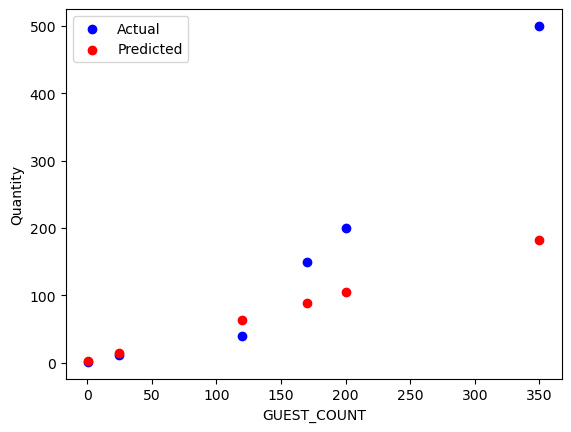

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('GUEST_COUNT')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

# Example Data
data = pd.DataFrame({
    'PRODUCT_NAME': ['Chicken Seekh Kebab', 'Dal Tadka', 'Gobi Pepper Fry', 'KARAMPODI CHICKEN', 
                      'KARAMPODI CHICKEN', 'KARAMPODI CHICKEN', 'Kadai Paneer', 'Kulfi - Malai', 
                      'Kulfi - Malai', 'Kulfi - Malai', 'Kulfi - Mango (Mini Size)', 
                      'Kulfi - Paan (Mini Size)', 'Kulfi - Pistacio', 'Kulfi - Pistacio (Mini Size)', 
                      'Kulfi - Strawberry', 'LIVE COUNTER - SAMOSA CHOLE CHAAT', 
                      'LIVE COUNTER - SAMOSA CHOLE CHAAT', 'LIVE COUNTER - SAMOSA CHOLE CHAAT', 
                      'LIVE STATION - PAANI POORI (8 PCS PER PERSON)', 
                      'LIVE STATION - PAANI POORI (8 PCS PER PERSON)', 
                      'PAAV BHAJI (LIVE COUNTER)', 'Raitha', 'VEG MOMO', 'VEG MOMO', 
                      'Veg Hakka Noodles', 'Village Chicken Curry', 'Village Chicken Curry'],
    'GUEST_COUNT': [150, 1, 1, 60, 100, 150, 1, 25, 100, 350, 120, 120, 170, 120, 25, 50, 60, 100, 
                    60, 250, 55, 1, 35, 200, 1, 1, 1],
    'QUANTITY': [3, 1, 13, 2, 1, 1, 1, 12, 35, 500, 40, 40, 150, 40, 12, 50, 60, 100, 30, 250, 
                 55, 1, 150, 200, 1, 1, 1]
})

# Aggregate quantities per dish and guest count
dish_quantities = data.groupby(['PRODUCT_NAME', 'GUEST_COUNT'])['QUANTITY'].sum().reset_index()

# Calculate average quantities per guest count
avg_dish_quantities = dish_quantities.groupby(['PRODUCT_NAME', 'GUEST_COUNT'])['QUANTITY'].mean().reset_index()

# Prepare data for training
training_data = dish_quantities.merge(avg_dish_quantities, on=['PRODUCT_NAME', 'GUEST_COUNT'], how='left', suffixes=('', '_avg'))
training_data.fillna(0, inplace=True)

# Define features and target variable
X = training_data[['GUEST_COUNT']]
y = training_data['QUANTITY_avg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a file
model_filename = 'catering_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Load the model from the file
loaded_model = joblib.load(model_filename)

# Define a new instance
new_instance = pd.DataFrame({'GUEST_COUNT': [75]})  # Example guest count

# Predict the quantity using the loaded model
predicted_quantity = loaded_model.predict(new_instance)

# Display the prediction
print(f"Predicted quantity for {new_instance['GUEST_COUNT'].values[0]} guests: {predicted_quantity[0]:.2f}")


Model saved to catering_model.pkl
Predicted quantity for 75 guests: 54.61
